# Telco Churn Analysis

### Import necessary libraries & load data

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [15]:
file = Path("__file__").parent / "telco-customer-churn.csv"
df = pd.read_csv(file)

plt.style.use('seaborn-v0_8-talk')

## Initial Data Exploration

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### High-level overview of the data

<BarContainer object of 2 artists>

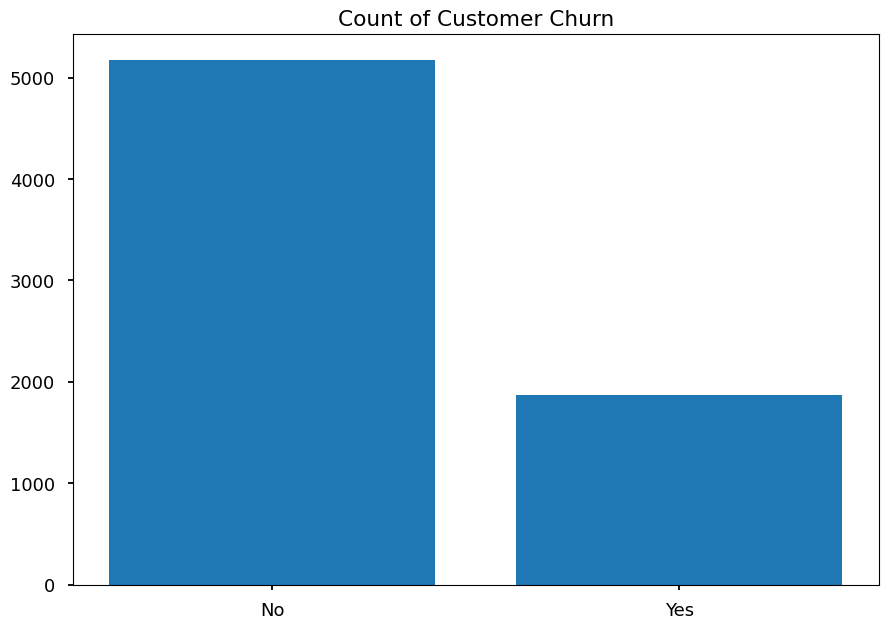

In [18]:
churn = df['Churn'].value_counts()
plt.title('Count of Customer Churn')
plt.bar(churn.index, churn.values)

([<matplotlib.patches.Wedge at 0x1471cda90>,
 [Text(-0.7393678155529122, 0.8144539479458093, 'No'),
  Text(0.7393680809356543, -0.8144537070291521, 'Yes')],
 [Text(-0.40329153575613386, 0.4442476079704414, '73.5%'),
  Text(0.40329168051035685, -0.44424747656135566, '26.5%')])

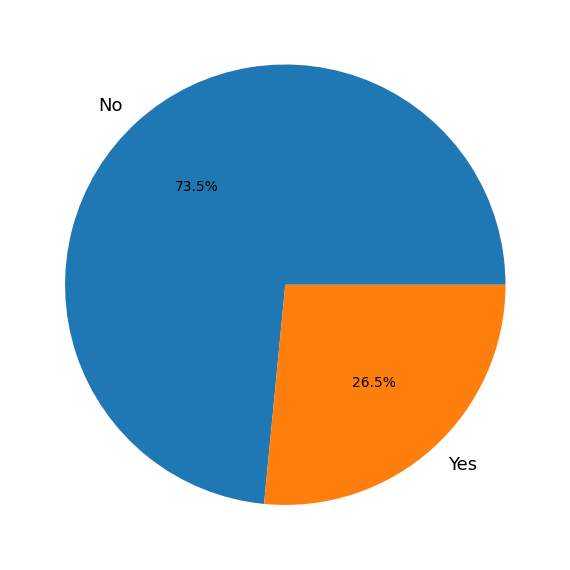

In [19]:
pct_churn = df['Churn'].value_counts(normalize=True)
plt.pie(pct_churn, labels=pct_churn.index, autopct='%1.1f%%')

### Understanding the data that causes churn

#### Numeric Features

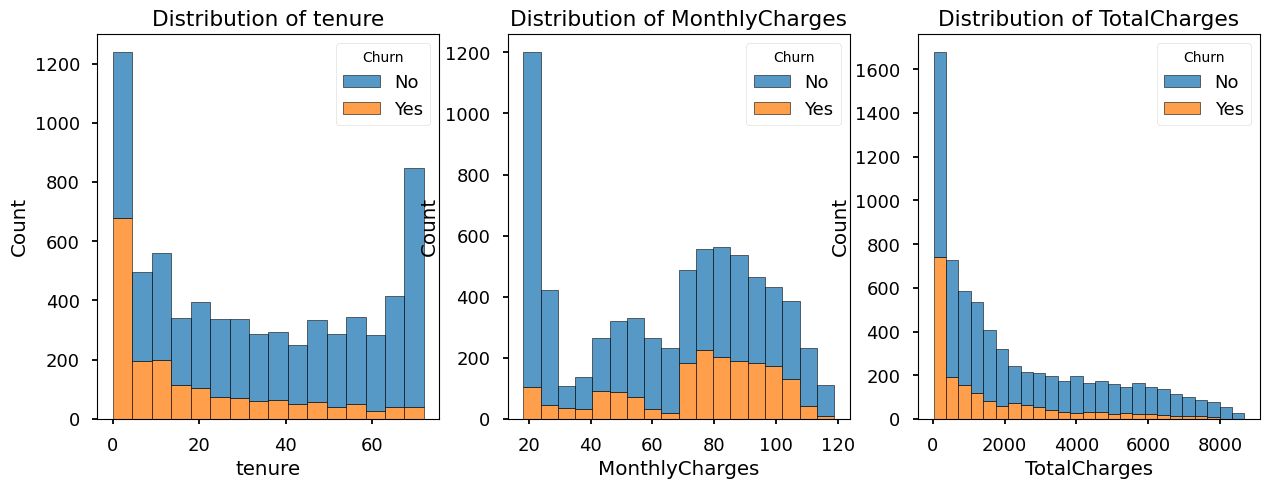

In [20]:
#| column: body-outset-left
#| out-width: 100%
#| fig-align: center
#| width: 100%
#| fig-caption: Distribution of numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1, 3, figsize=(15, 5)) 
for i, feature in enumerate(numerical_features):
    if feature == 'TotalCharges':
        df[feature] = pd.to_numeric(df[feature], errors='coerce')  # Convert to numeric
    sns.histplot(data=df, x=feature, hue='Churn', multiple="stack", ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

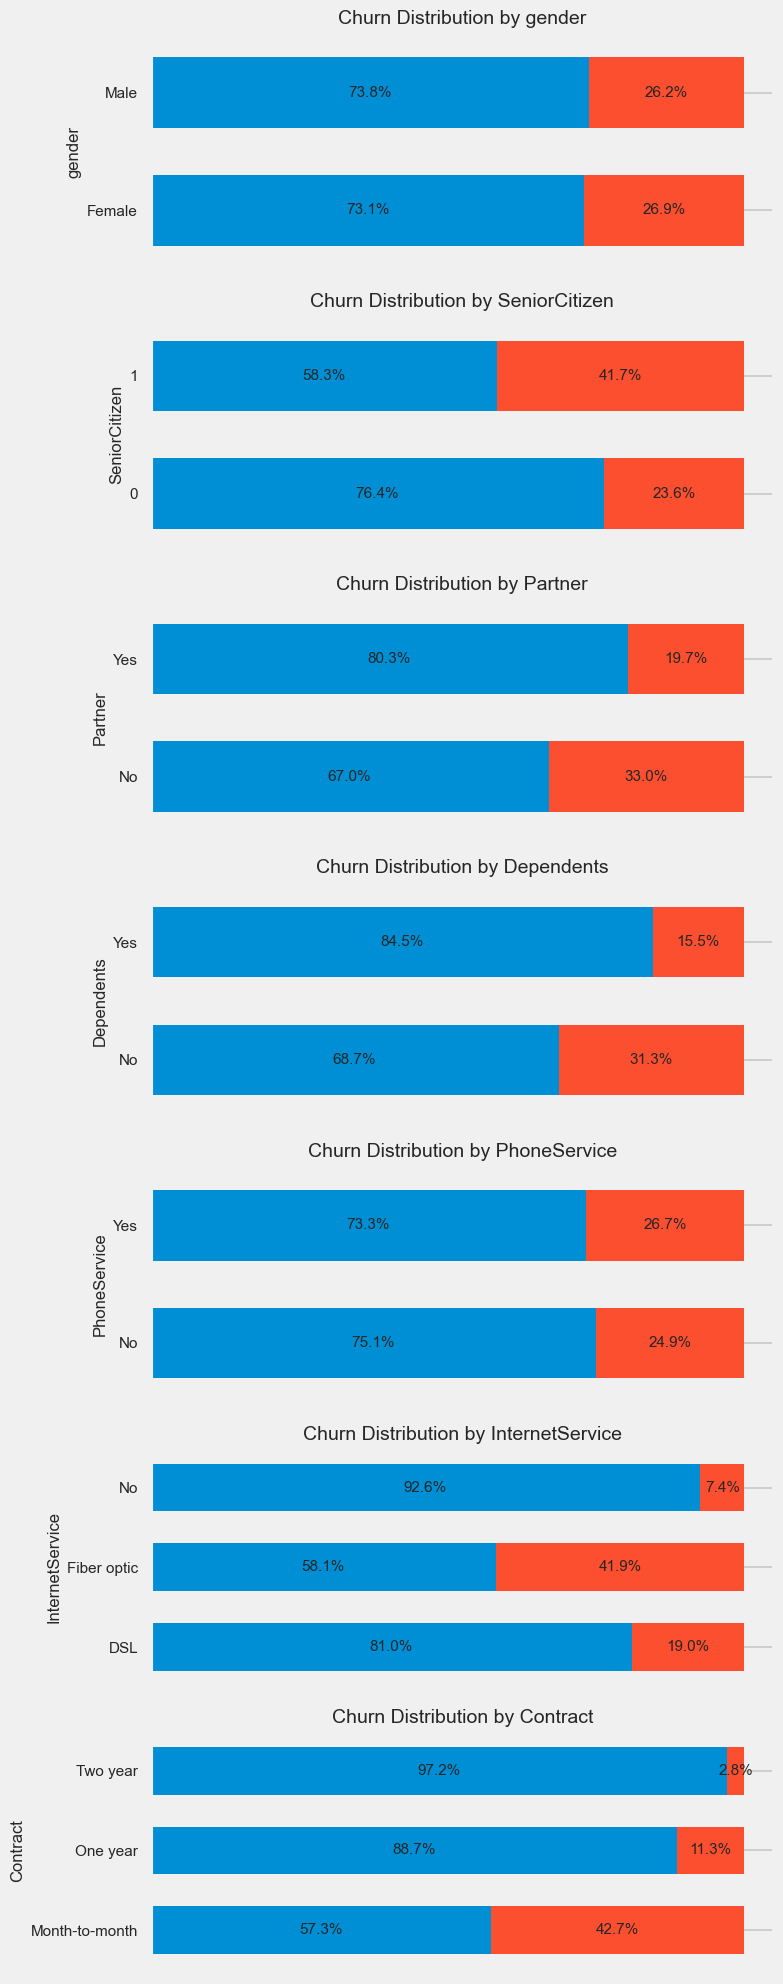

: 

: 

In [ ]:
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Contract']
fig, axes = plt.subplots(7, 1, figsize=(8, 20))
axes = axes.flatten()

plt.rcParams.update({'font.size': 12})  # Increase base font size

for i, feature in enumerate(categorical_features):
    # Calculate percentages
    percentages = (df.groupby(feature)['Churn']
                    .value_counts(normalize=True)
                    .unstack()
                    .mul(100))
    
    # Create horizontal stacked bars
    percentages.plot(kind='barh', 
                    stacked=True,
                    ax=axes[i],
                    legend=False,
                    width=0.6)  # Changed from height to width
    
    # Customize the plot
    axes[i].set_title(f'Churn Distribution by {feature}', fontsize=14, pad=-30)
    axes[i].set_ylabel(feature, fontsize=12)
    
    # Add percentage labels on the bars
    for c in axes[i].containers:
        axes[i].bar_label(c, fmt='%.1f%%', label_type='center', fontsize=11)
    
    # Remove x-axis percentage labels
    axes[i].set_xticks([])
    
    # Add border around the subplot
    for spine in axes[i].spines.values():
        spine.set_visible(True)
    
    # Make tick labels larger
    axes[i].tick_params(axis='both', which='major', labelsize=11)
    
    # Adjust plot to reduce white space
    axes[i].margins(y=0.15)  # Reduce vertical margins

# Remove empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

### Some more detailed analysis

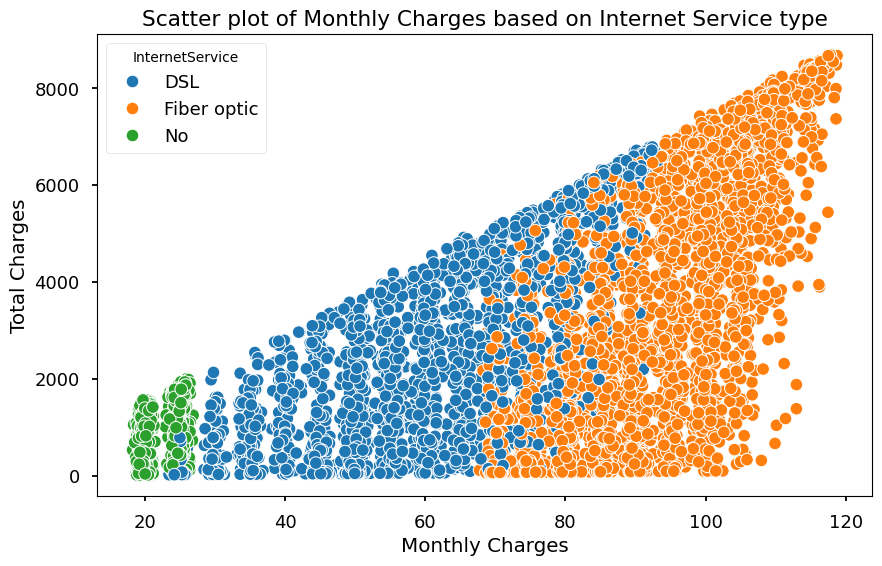

In [21]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='InternetService')
plt.title('Scatter plot of Monthly Charges based on Internet Service type')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()

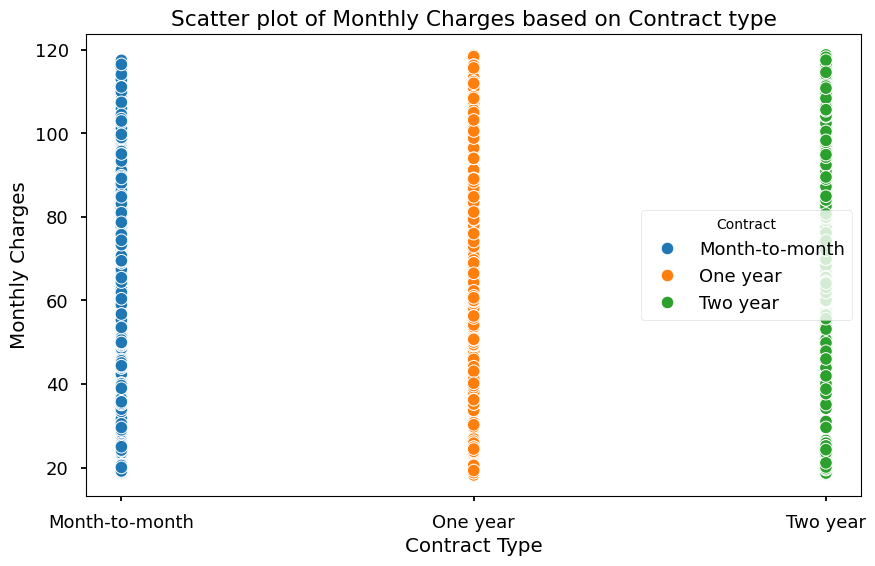

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Contract', y='MonthlyCharges', hue='Contract')
plt.title('Scatter plot of Monthly Charges based on Contract type')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.show()

In [23]:
def plot_churn_by_tenure(data, contract_type):
    # Create the bins
    bins = np.arange(0, data['tenure'].max() + 2, 2)  # +2 to include the last value
    data['tenure_bin'] = pd.cut(data['tenure'], bins=bins)
    
    # Calculate percentage of churned customers in each bin
    churn_by_tenure = (data.groupby('tenure_bin')['Churn']
                          .value_counts(normalize=True)
                          .unstack())
    
    plt.figure(figsize=(12, 8))
    churn_by_tenure['Yes'].multiply(100).plot(kind='bar')
    plt.title(f'Percentage of Churned Customers by Tenure Length\n{contract_type} Contracts')
    plt.xlabel('Tenure (months)')
    plt.ylabel('Churn Percentage')
    plt.axhline(y=50, color='r', linestyle='--', alpha=0.3)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    # print(f"\nChurn percentage by tenure bins for {contract_type} contracts:")
    # print(churn_by_tenure['Yes'].multiply(100).round(1))

# Create three dataframes
monthly = df[df['Contract'] == 'Month-to-month']
one_year = df[df['Contract'] == 'One year']
two_year = df[df['Contract'] == 'Two year']

/var/folders/rz/zcgcqm0x1bl9cj8slq9l2s1c0000gn/T/ipykernel_8425/642956251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tenure_bin'] = pd.cut(data['tenure'], bins=bins)
/var/folders/rz/zcgcqm0x1bl9cj8slq9l2s1c0000gn/T/ipykernel_8425/642956251.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = (data.groupby('tenure_bin')['Churn']


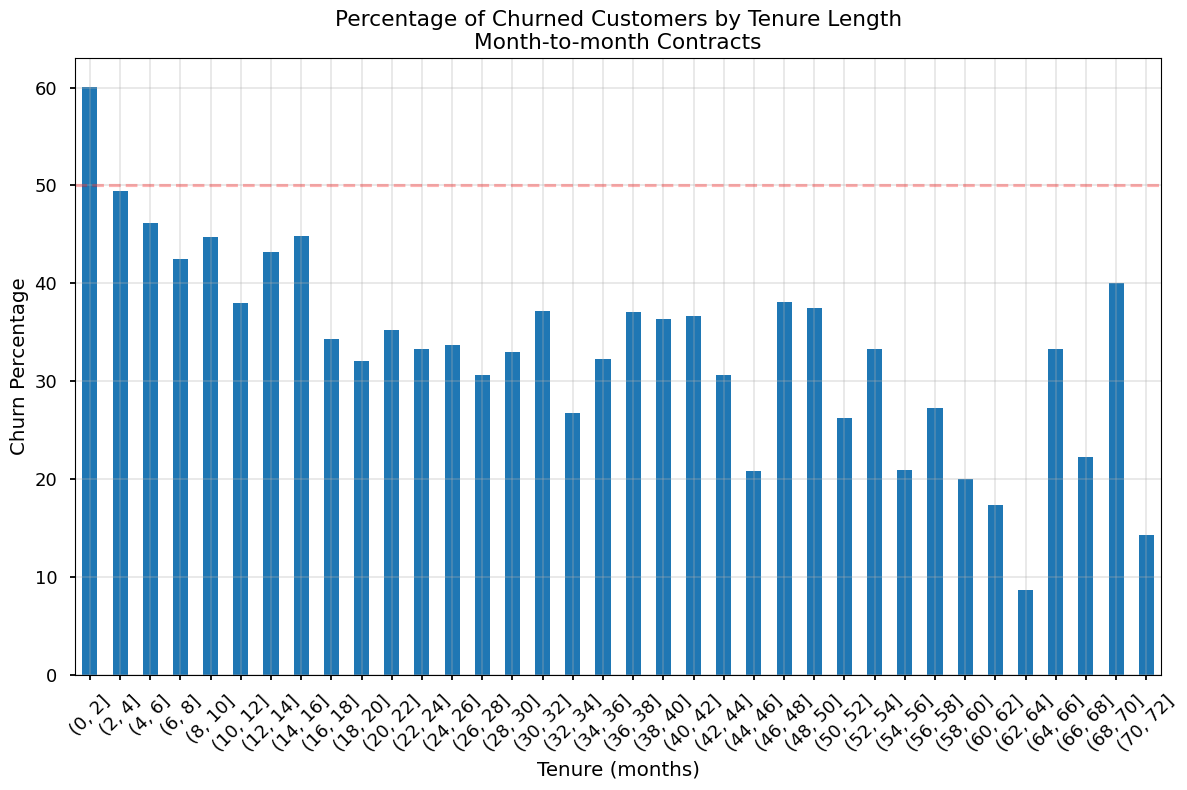

In [24]:
plot_churn_by_tenure(monthly, 'Month-to-month')

/var/folders/rz/zcgcqm0x1bl9cj8slq9l2s1c0000gn/T/ipykernel_8425/642956251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tenure_bin'] = pd.cut(data['tenure'], bins=bins)
/var/folders/rz/zcgcqm0x1bl9cj8slq9l2s1c0000gn/T/ipykernel_8425/642956251.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = (data.groupby('tenure_bin')['Churn']


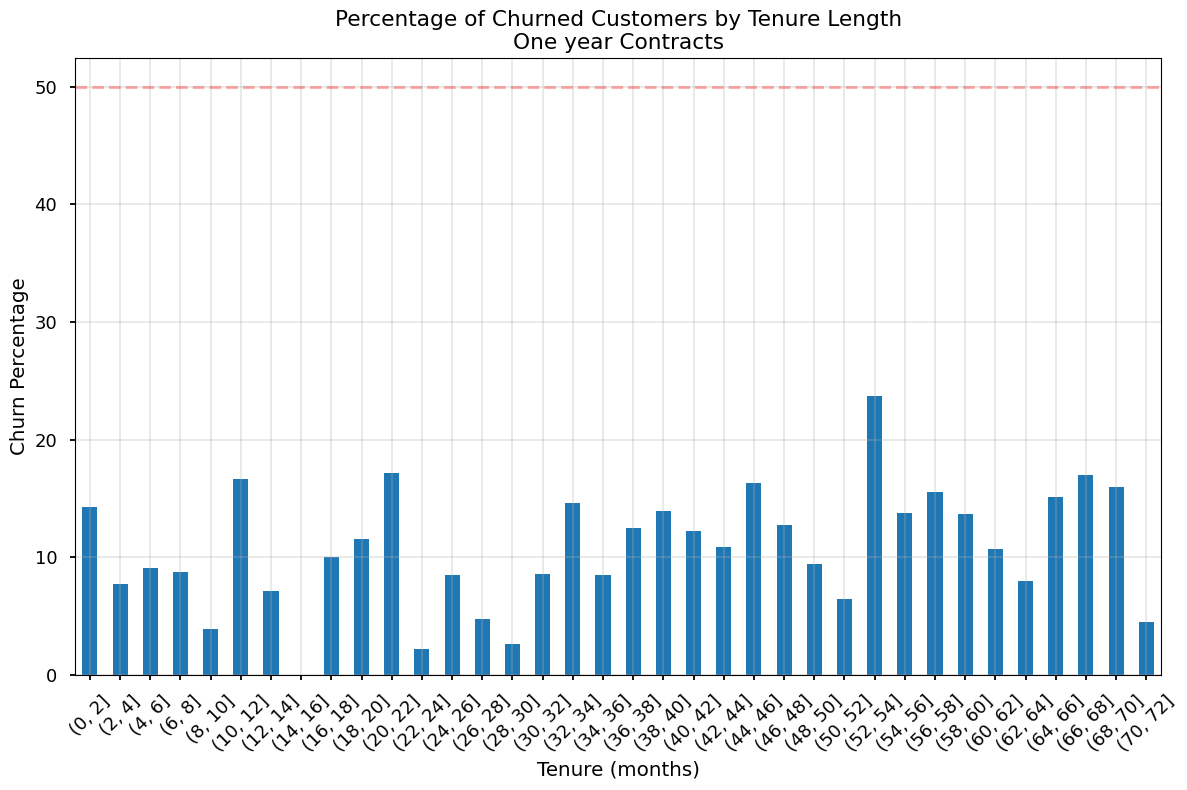

In [25]:
plot_churn_by_tenure(one_year, 'One year')

/var/folders/rz/zcgcqm0x1bl9cj8slq9l2s1c0000gn/T/ipykernel_8425/642956251.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tenure_bin'] = pd.cut(data['tenure'], bins=bins)
/var/folders/rz/zcgcqm0x1bl9cj8slq9l2s1c0000gn/T/ipykernel_8425/642956251.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = (data.groupby('tenure_bin')['Churn']


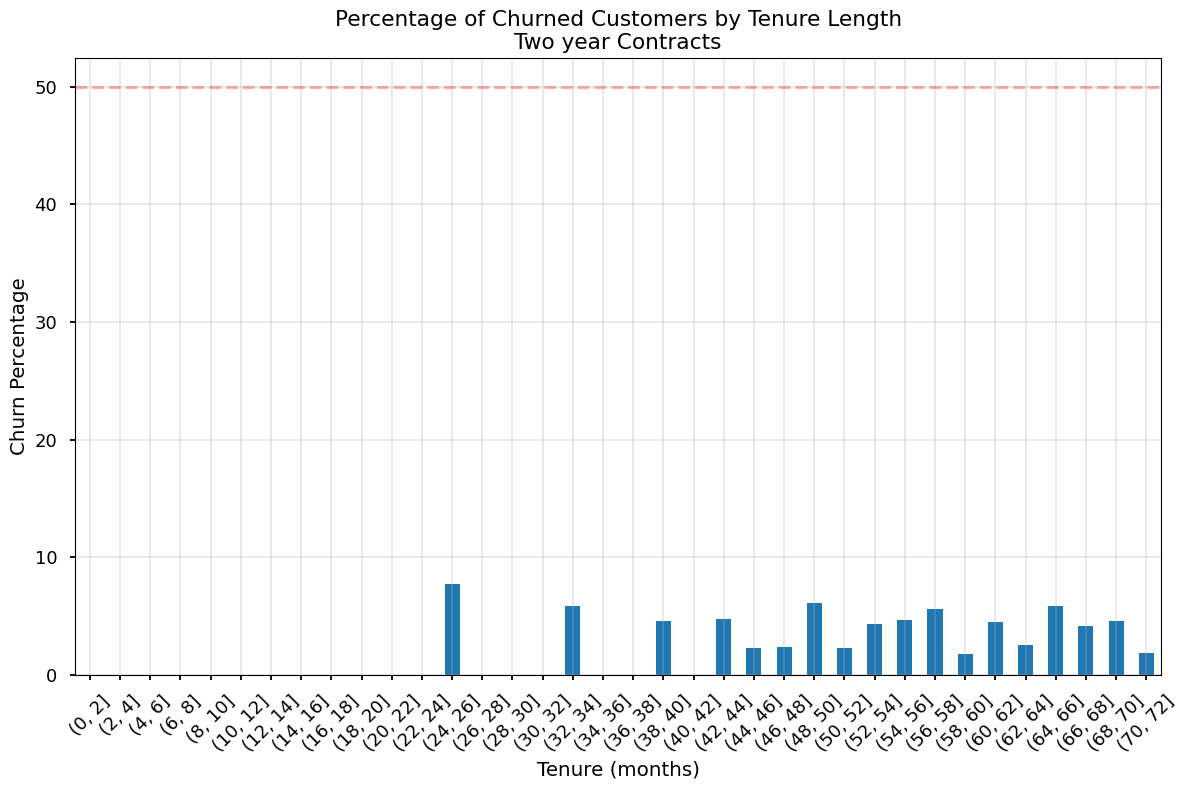

In [26]:
plot_churn_by_tenure(two_year, 'Two year')  

## Model building

In [27]:
# Prep data

# Convert columns to binary and create new lowercase columns
df['gender_male'] = (df.gender=='Male')
df['senior_citizen'] = (df.SeniorCitizen==1)
df['partner'] = (df.Partner=='Yes')
df['dependents'] = (df.Dependents=='Yes')
df['phone_service'] = (df.PhoneService=='Yes')
df['multiple_lines'] = (df.MultipleLines=='Yes')
df['single_line'] = (df.MultipleLines=='No')

df['fiber_optic'] = (df.InternetService=='Fiber optic')
df['dsl'] = (df.InternetService=='DSL')

df['online_security'] = (df.OnlineSecurity=='Yes')
df['online_backup'] = (df.OnlineBackup=='Yes')
df['device_protection'] = (df.DeviceProtection=='Yes')
df['tech_support'] = (df.TechSupport=='Yes')
df['streaming_tv'] = (df.StreamingTV=='Yes')
df['streaming_movies'] = (df.StreamingMovies=='Yes')

df['month_to_month'] = (df.Contract=='Month-to-month')
df['one_year'] = (df.Contract=='One year')
df['two_year'] = (df.Contract=='Two year')

df['paperless_billing'] = (df.PaperlessBilling=='Yes')
df['electronic_check'] = (df.PaymentMethod=='Electronic check')
df['mailed_check'] = (df.PaymentMethod=='Mailed check')
df['bank_transfer'] = (df.PaymentMethod=='Bank transfer (automatic)')
df['credit_card'] = (df.PaymentMethod=='Credit card (automatic)')

df["total_charges"] = pd.to_numeric(df.TotalCharges, errors='coerce').fillna(0)
df['monthly_charges'] = df.MonthlyCharges
df['tenure'] = df.tenure

df['churn'] = (df.Churn=='Yes')

# Drop all original columns
columns_to_drop = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
                  'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                  'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                  'TotalCharges', 'MonthlyCharges', 'Churn']

df.drop(columns=columns_to_drop, inplace=True)


In [31]:
df.head()

,tenure,gender_male,senior_citizen,partner,dependents,phone_service,multiple_lines,single_line,fiber_optic,dsl,...,one_year,two_year,paperless_billing,electronic_check,mailed_check,bank_transfer,credit_card,total_charges,monthly_charges,churn
0,1,False,False,True,False,False,False,False,False,True,...,False,False,True,True,False,False,False,29.85,29.85,False
1,34,True,False,False,False,True,False,True,False,True,...,True,False,False,False,True,False,False,1889.50,56.95,False
2,2,True,False,False,False,True,False,True,False,True,...,False,False,True,False,True,False,False,108.15,53.85,True
3,45,True,False,False,False,False,False,False,False,True,...,True,False,False,False,False,True,False,1840.75,42.30,False
4,2,False,False,False,False,True,False,True,True,False,...,False,False,True,True,False,False,False,151.65,70.70,True


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tenure             7043 non-null   int64  
 1   gender_male        7043 non-null   bool   
 2   senior_citizen     7043 non-null   bool   
 3   partner            7043 non-null   bool   
 4   dependents         7043 non-null   bool   
 5   phone_service      7043 non-null   bool   
 6   multiple_lines     7043 non-null   bool   
 7   single_line        7043 non-null   bool   
 8   fiber_optic        7043 non-null   bool   
 9   dsl                7043 non-null   bool   
 10  online_security    7043 non-null   bool   
 11  online_backup      7043 non-null   bool   
 12  device_protection  7043 non-null   bool   
 13  tech_support       7043 non-null   bool   
 14  streaming_tv       7043 non-null   bool   
 15  streaming_movies   7043 non-null   bool   
 16  month_to_month     7043 

### Standardize numerical columns

In [33]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Select the columns to standardize
columns_to_scale = ['tenure', 'monthly_charges', 'total_charges']

# Apply scaling to the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Define features and target variable
X = df.drop(columns=['churn'])
# X = df.drop(columns=['churn'])

y = df['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Balance the training data (roughly equal number of churned and non-churned customers)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Create and train the logistic regression model
model = LogisticRegression(max_iter=5000)
# model = XGBClassifier(learning_rate=0.01,max_depth = 3,n_estimators = 1000)
# model = RandomForestClassifier(max_depth=8, n_estimators=200, random_state=42)
model.fit(X_resampled, y_resampled)

# Make predictions
y_pred_orig = model.predict(X_test)
y_pred = model.predict_proba(X_test)

# Play around with the ROC threshold
y_pred = np.where(y_pred[:,0] < 0.70, 1, 0)

print(y_pred_orig[0:10])

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[ True False False  True False False False False False False]
[[627 409]
 [ 32 341]]
              precision    recall  f1-score   support

       False       0.95      0.61      0.74      1036
        True       0.45      0.91      0.61       373

    accuracy                           0.69      1409
   macro avg       0.70      0.76      0.67      1409
weighted avg       0.82      0.69      0.70      1409

